<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape
print(f"В датасете {df.duplicated().sum()} дублей")

В датасете 1170 дублей


In [5]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [6]:
df_train.describe(include = 'object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [7]:
df_test.describe(include = 'object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [8]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [9]:
#!pip install ydata_profiling

In [140]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [13]:
df_test.info()
print('В датасете есть пропуски в колонках - mileage, engine, max_power, torque, seats')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB
В датасете есть пропуски в колонках - mileage, engine, max_power, torque, seats


In [14]:
df_train_dropsell = df_train.drop('selling_price', axis=1).copy()

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [15]:
pd.set_option('display.max_rows', 30)

print(f"В датасете df_train без целевой переменной  selling_price - {df_train_dropsell.duplicated().sum()} дублей")
df_train_dublicate=df_train_dropsell[df_train_dropsell.duplicated()]
df_train=df_train.drop(df_train_dublicate.index)
df_train.shape
df_train=df_train.reset_index(drop=True)
df_train

В датасете df_train без целевой переменной  selling_price - 1159 дублей


name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [16]:
df_train_dublicate

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [17]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [18]:
df_train['mileage'] = df_train['mileage'].str.split().str[0].astype(float)
df_train['engine'] = df_train['engine'].str.split().str[0].astype(float)
df_train['max_power'] = df_train['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test['mileage'] = df_test['mileage'].str.split().str[0].astype(float)
df_test['engine'] = df_test['engine'].str.split().str[0].astype(float)
df_test['max_power'] = df_test['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

In [19]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [20]:
# import math
# import re

# def change(x):
#   if isinstance(x, str):
    # numbers = re.findall(r'\d+(?:[.,]\d+)?', x)
  # for i in range(1,len(x)+1):
  #   numbers[i].replace('.','')
  #   numbers[i].replace(',','')
  # if len(x)==3:
  #   numbers[1]=(numbers[1]+numbers[2])/2
  #   numbers.pop()
  # # M=numbers[0]
  # # n=numbers[1]
  # # if 'kgm' in x.lower():
  #   print(numbers)
  #   return numbers
  # else:
  #   return ['0','0']


df_train['mileage']=df_train['mileage'].apply(lambda x : df_train['mileage'].median() if pd.isna(x) else x)
df_train['engine']=df_train['engine'].apply(lambda x : df_train['engine'].median() if pd.isna(x) else x)
df_train['max_power']=df_train['max_power'].apply(lambda x : df_train['max_power'].median() if pd.isna(x) else x)
df_train['seats']=df_train['seats'].apply(lambda x : df_train['seats'].median() if pd.isna(x) else x)
df_test['mileage']=df_test['mileage'].apply(lambda x : df_test['mileage'].median() if pd.isna(x) else x)
df_test['engine']=df_test['engine'].apply(lambda x : df_test['engine'].median() if pd.isna(x) else x)
df_test['max_power']=df_test['max_power'].apply(lambda x : df_test['max_power'].median() if pd.isna(x) else x)
df_test['seats']=df_test['seats'].apply(lambda x : df_test['seats'].median() if pd.isna(x) else x)
# df_test['engine'].unique().tolist()
# df['torque'] = df['torque'].apply(change)
# df_train['mileage'].median()
# for st in df_train['mileage'].unique():
#   if pd.isna(st):
#     print('True')
df_test.head(60)

name  year  selling_price  km_driven  \
0                   Mahindra Xylo E4 BS IV  2010         229999     168000   
1               Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                     Honda Civic 1.8 S AT  2007         175000     218463   
3                     Honda City i DTEC VX  2015         635000     173000   
4   Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                     ...   ...            ...        ...   
55                    Renault KWID 1.0 RXL  2018         275000      20000   
56                         Maruti Ritz VXi  2012         320000      40000   
57                      Tata Sumo EX BS IV  2012         254999     190000   
58                  Hyundai i20 Sportz 1.2  2012         300000     120000   
59                Tata Indica Vista TDI LS  2011         110000     120000   

      fuel seller_type transmission         owner  mileage  engine  max_power  \
0   Diesel  Individual       Manual   First Owner    14.00  2498.0     112.00   
1   Diesel  Individual       Manual   First Owner    21.50  1497.0     108.50   
2   Petrol  Individual    Automatic   First Owner    12.90  1799.0     130.00   
3   Diesel  Individual       Manual   First Owner    25.10  1498.0      98.60   
4   Petrol  Individual       Manual  Second Owner    16.50  1172.0      65.00   
..     ...         ...          ...           ...      ...     ...        ...   
55  Petrol  Individual       Manual   First Owner    23.01   999.0      67.00   
56  Petrol  Individual       Manual   First Owner    18.50  1197.0      85.80   
57  Diesel  Individual       Manual   Third Owner    19.33  1248.0      83.10   
58  Petrol  Individual       Manual   First Owner    18.50  1197.0      82.85   
59  Diesel  Individual       Manual   First Owner    19.40  1405.0      70.00   

    seats  
0     7.0  
1     5.0  
2     5.0  
3     5.0  
4     5.0  
..    ...  
55    5.0  
56    5.0  
57    5.0  
58    5.0  
59    5.0  

[60 rows x 12 columns]

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [21]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)
df_test.head(60)

name  year  selling_price  km_driven  \
0                   Mahindra Xylo E4 BS IV  2010         229999     168000   
1               Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                     Honda Civic 1.8 S AT  2007         175000     218463   
3                     Honda City i DTEC VX  2015         635000     173000   
4   Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                     ...   ...            ...        ...   
55                    Renault KWID 1.0 RXL  2018         275000      20000   
56                         Maruti Ritz VXi  2012         320000      40000   
57                      Tata Sumo EX BS IV  2012         254999     190000   
58                  Hyundai i20 Sportz 1.2  2012         300000     120000   
59                Tata Indica Vista TDI LS  2011         110000     120000   

      fuel seller_type transmission         owner  mileage  engine  max_power  \
0   Diesel  Individual       Manual   First Owner    14.00    2498     112.00   
1   Diesel  Individual       Manual   First Owner    21.50    1497     108.50   
2   Petrol  Individual    Automatic   First Owner    12.90    1799     130.00   
3   Diesel  Individual       Manual   First Owner    25.10    1498      98.60   
4   Petrol  Individual       Manual  Second Owner    16.50    1172      65.00   
..     ...         ...          ...           ...      ...     ...        ...   
55  Petrol  Individual       Manual   First Owner    23.01     999      67.00   
56  Petrol  Individual       Manual   First Owner    18.50    1197      85.80   
57  Diesel  Individual       Manual   Third Owner    19.33    1248      83.10   
58  Petrol  Individual       Manual   First Owner    18.50    1197      82.85   
59  Diesel  Individual       Manual   First Owner    19.40    1405      70.00   

    seats  
0       7  
1       5  
2       5  
3       5  
4       5  
..    ...  
55      5  
56      5  
57      5  
58      5  
59      5  

[60 rows x 12 columns]

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [22]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [23]:
df_train.describe(include = 'object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [24]:
df_test.describe(include = 'object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [25]:
df_test.describe()


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.338050  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951748   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.865230     5.403000  
std      34.887729     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      83.100000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [26]:
df_train[df_train['km_driven']>600000]
#как видим строки под номером 1397 и 2680 имеют аномальные пробеги. Удалим их!

name  year  selling_price  km_driven    fuel  \
1397  Mahindra XUV500 W6 2WD  2012         500000    1500000  Diesel   
2680    Hyundai i20 Asta 1.2  2007         550000    2360457  Petrol   

     seller_type transmission         owner  mileage  engine  max_power  seats  
1397  Individual       Manual   First Owner     15.1    2179     140.00      7  
2680  Individual       Manual  Second Owner     18.6    1197      81.83      5

In [27]:
df_train=df_train[df_train['km_driven']<600000]

In [28]:
df_train=df_train.reset_index(drop=True)

In [29]:
df_train[df_train['mileage']<9]
#Как видим есть аномальная топливная эффективность со значением 0. Уберем их!

name  year  selling_price  \
533   Tata Indica Vista Aura Safire Anniversary Edition  2009         135000   
1276                             Hyundai Santro Xing GL  2008         105000   
1301                Mercedes-Benz M-Class ML 350 4Matic  2011        1700000   
1659                    Land Rover Freelander 2 TD4 HSE  2013        1650000   
1850                       Hyundai Santro Xing (Non-AC)  2010         110000   
2113                       Hyundai Santro Xing (Non-AC)  2013         184000   
3825                             Hyundai Santro Xing GL  2008         175000   
4252                        Volkswagen Polo GT TSI BSIV  2014         574000   
4255                        Volkswagen Polo GT TSI BSIV  2014         575000   
4303                     Mahindra Bolero Pik-Up FB 1.7T  2020         679000   
4759                             Hyundai Santro Xing GL  2010         150000   
4803                    Mahindra Bolero Pik-Up CBC 1.7T  2019         722000   
4950                             Hyundai Santro Xing GL  2011         150000   
5325                      Mercedes-Benz GLC 220d 4MATIC  2017        3300000   

      km_driven    fuel seller_type transmission                 owner  \
533       28900  Petrol  Individual       Manual          Second Owner   
1276     128000  Petrol  Individual       Manual           First Owner   
1301     110000  Diesel  Individual    Automatic           Third Owner   
1659      64788  Diesel      Dealer    Automatic           First Owner   
1850      80000  Petrol  Individual       Manual          Second Owner   
2113      15000  Petrol  Individual       Manual           First Owner   
3825      40000  Petrol  Individual       Manual           First Owner   
4252      28080  Petrol      Dealer    Automatic           First Owner   
4255      28100  Petrol      Dealer    Automatic           First Owner   
4303       5000  Diesel  Individual       Manual           First Owner   
4759     110000  Petrol  Individual       Manual           First Owner   
4803      80000  Diesel  Individual       Manual           First Owner   
4950      40000  Petrol  Individual       Manual  Fourth & Above Owner   
5325      60000  Diesel      Dealer    Automatic           First Owner   

      mileage  engine  max_power  seats  
533       0.0    1172      65.00      5  
1276      0.0    1086      62.00      5  
1301      0.0    2987     165.00      5  
1659      0.0    2179     115.00      5  
1850      0.0    1086      62.10      5  
2113      0.0    1086      62.10      5  
3825      0.0    1086      62.00      5  
4252      0.0    1197     103.25      5  
4255      0.0    1197     103.25      5  
4303      0.0    2523      70.00      2  
4759      0.0    1086      62.00      5  
4803      0.0    2523      70.00      2  
4950      0.0    1086      62.00      5  
5325      0.0    1950     194.00      5

In [30]:
df_train=df_train[df_train['mileage']>=9]

In [31]:
df_test[df_test['mileage']<9]
#Здесь тоже есть одна аномальная строка

name  year  selling_price  km_driven    fuel  \
130  Hyundai Santro Xing GL  2009         120000      90000  Petrol   

    seller_type transmission         owner  mileage  engine  max_power  seats  
130  Individual       Manual  Second Owner      0.0    1086       62.0      5

In [32]:
df_test=df_test[df_test['mileage']>=9]

In [33]:
df_train[df_train['max_power']<30]
#Есть три строки с аномальными значениями max_power. Тоже уберем их!

name  year  selling_price  km_driven    fuel  \
476               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
1112  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2002   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   

     seller_type transmission        owner  mileage  engine  max_power  seats  
476   Individual       Manual  First Owner    19.37    1248        0.0      5  
1112      Dealer       Manual  First Owner    19.37    1248        0.0      5  
2002  Individual       Manual  First Owner    19.37    1248        0.0      5

In [34]:
df_train = df_train[df_train['max_power']>=30]

In [35]:
df_train.shape

(5821, 12)

1. В датасете df_train в колонке km_driven аномалия, max - 2 360 457. Не бывает таких пробегов!
2. В df_train и df_test в колонке mileage	min - 0. Колонка mileage показывает топливную эффективность, т.е. сколько километров автомобиль может проехать на одном литре топлива. Получается в датасете есть автомобили, которые проезжают 0 км. на одно литре бензина, такого не бывает или возможно автомобиль неисправен, но тогда необходимо сделать колонку "Состояние автомобиля", в которой указано битый автомобиль или нет.
3. В датасет df_train в колонке max_power min - 0, т.е. есть автомобиль с максимальной мощность 0 лошадиных сил, такое не бывает.
Исключим из датасетов это недоразумение!

> Добавить блок с цитатой



In [36]:
assert df_train.shape == (5821, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

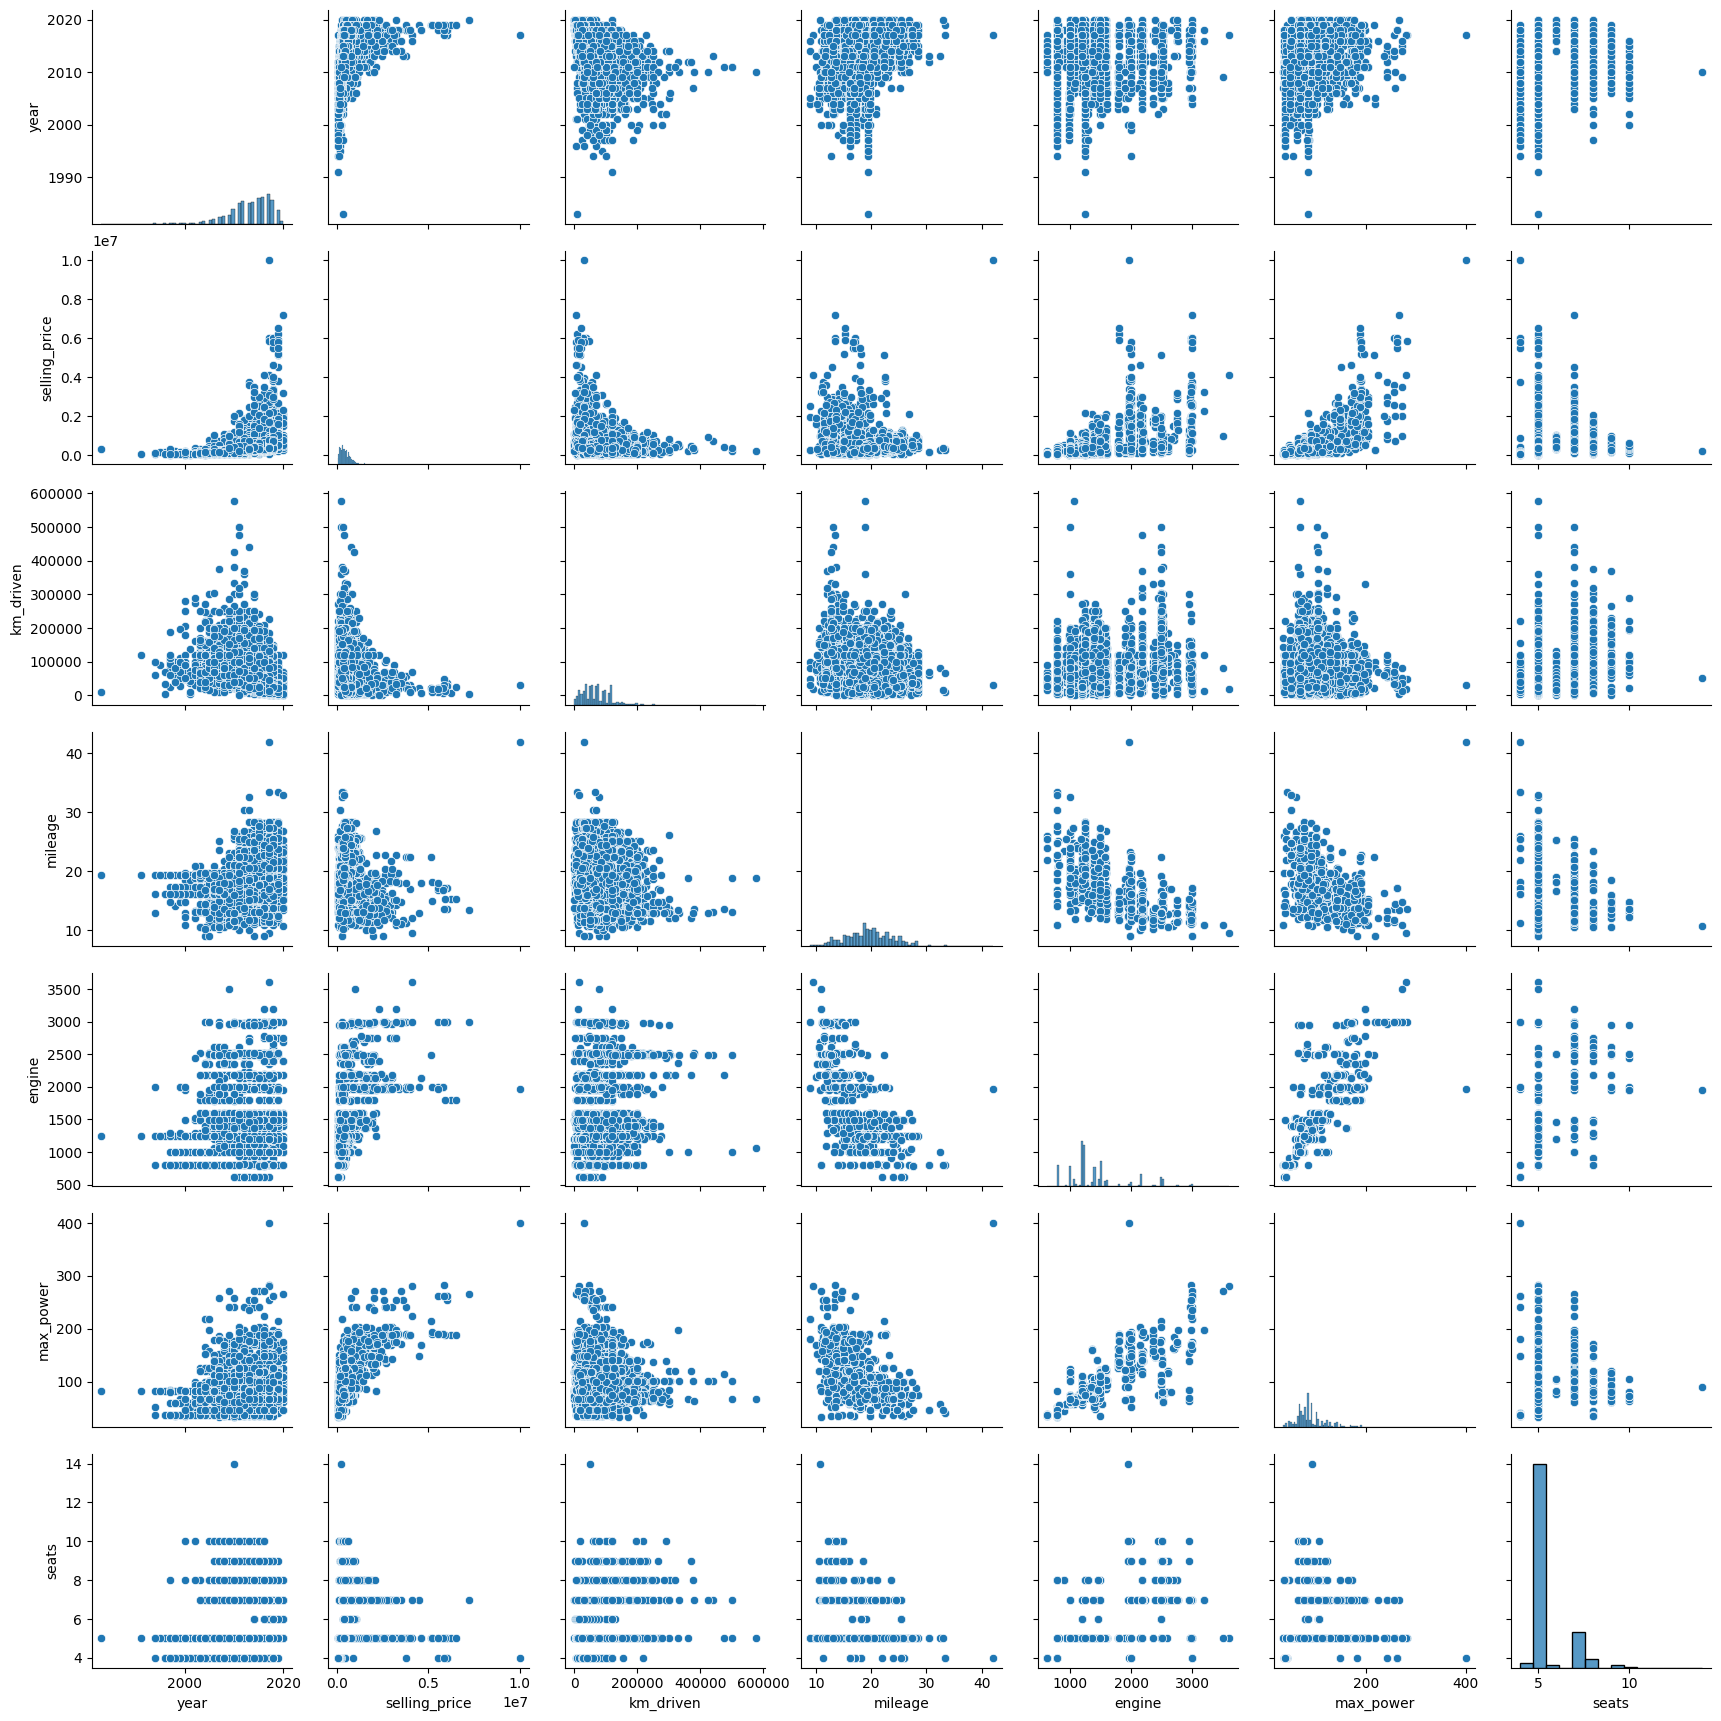

In [37]:
sns.pairplot(df_train)
#Вывод: По графикам мы видим связь целевой переменой с колонками year, km_driven, engine и max_power. Целевая переменная коррелирует с этими признаками

Вывод: По графикам мы видим связь целевой переменой с колонками year, km_driven, engine и max_power. Целевая переменная коррелирует с этими признаками

In [38]:
df_train[df_train['mileage']>=40]
#по графикам видна аномалия,mileage и selling_price точка в углу, посмотрим на нее поближе!
#ОГО, Volvo XC90 T8 Excellence BSIV, такой современный авомобиль и топливная эфективность 42? Вы шутите? Удаляем!!!!
#Еще в датасете присутствуют какие-то 10 и один 14-местный автомобили, ну да ладно!


name  year  selling_price  km_driven    fuel  \
151  Volvo XC90 T8 Excellence BSIV  2017       10000000      30000  Petrol   

    seller_type transmission        owner  mileage  engine  max_power  seats  
151  Individual    Automatic  First Owner     42.0    1969      400.0      4

In [39]:
df_train[df_train['km_driven']>=400000].head(50)

name  year  selling_price  \
2698                       Maruti Wagon R LXI Minor  2010         194000   
2778                       Maruti Wagon R VXI BS IV  2011         229999   
3700                          Mahindra Scorpio M2DI  2011         400000   
3760         Toyota Innova 2.5 VX (Diesel) 7 Seater  2013         750000   
3981   Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV  2010         950000   
4842  Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII  2011         350000   

      km_driven    fuel seller_type transmission         owner  mileage  \
2698     577414  Petrol  Individual       Manual  Second Owner    18.90   
2778     500000  Petrol  Individual       Manual  Second Owner    18.90   
3700     475000  Diesel  Individual       Manual   Third Owner    13.50   
3760     440000  Diesel  Individual       Manual  Second Owner    12.99   
3981     426000  Diesel  Individual       Manual   First Owner    12.80   
4842     500000  Diesel  Individual       Manual  Second Owner    12.99   

      engine  max_power  seats  
2698    1061      67.00      5  
2778     998      67.10      5  
3700    2179     115.00      5  
3760    2494     100.60      7  
3981    2494     102.00      7  
4842    2494     100.57      7

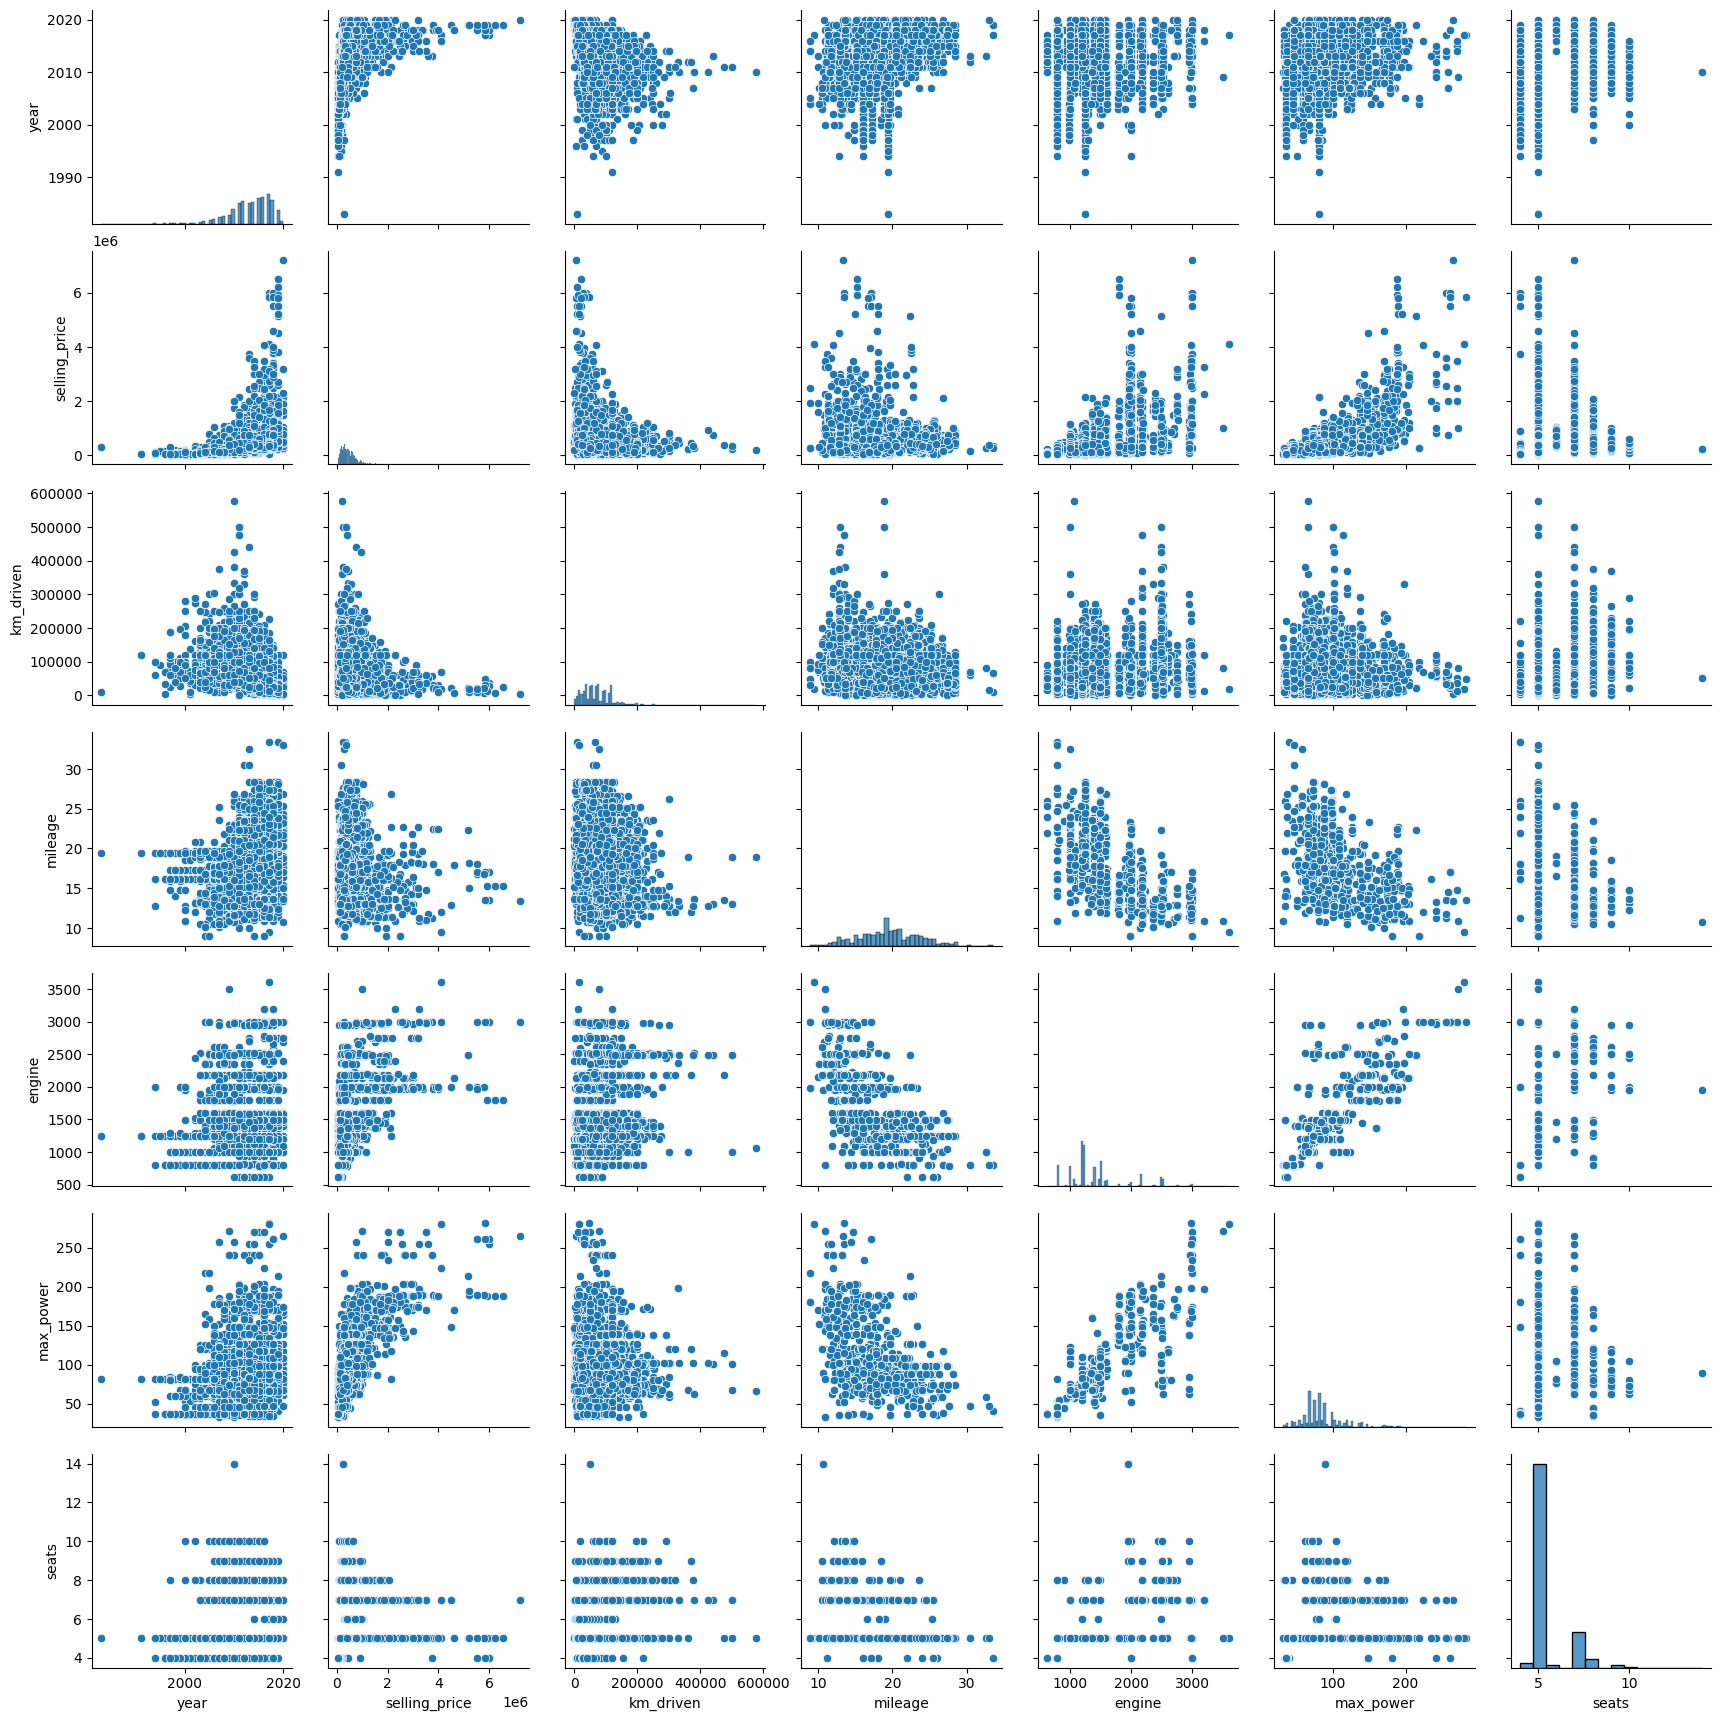

In [40]:
df_train = df_train[df_train['mileage']<40]
sns.pairplot(df_train)
#Совсем другое дело!

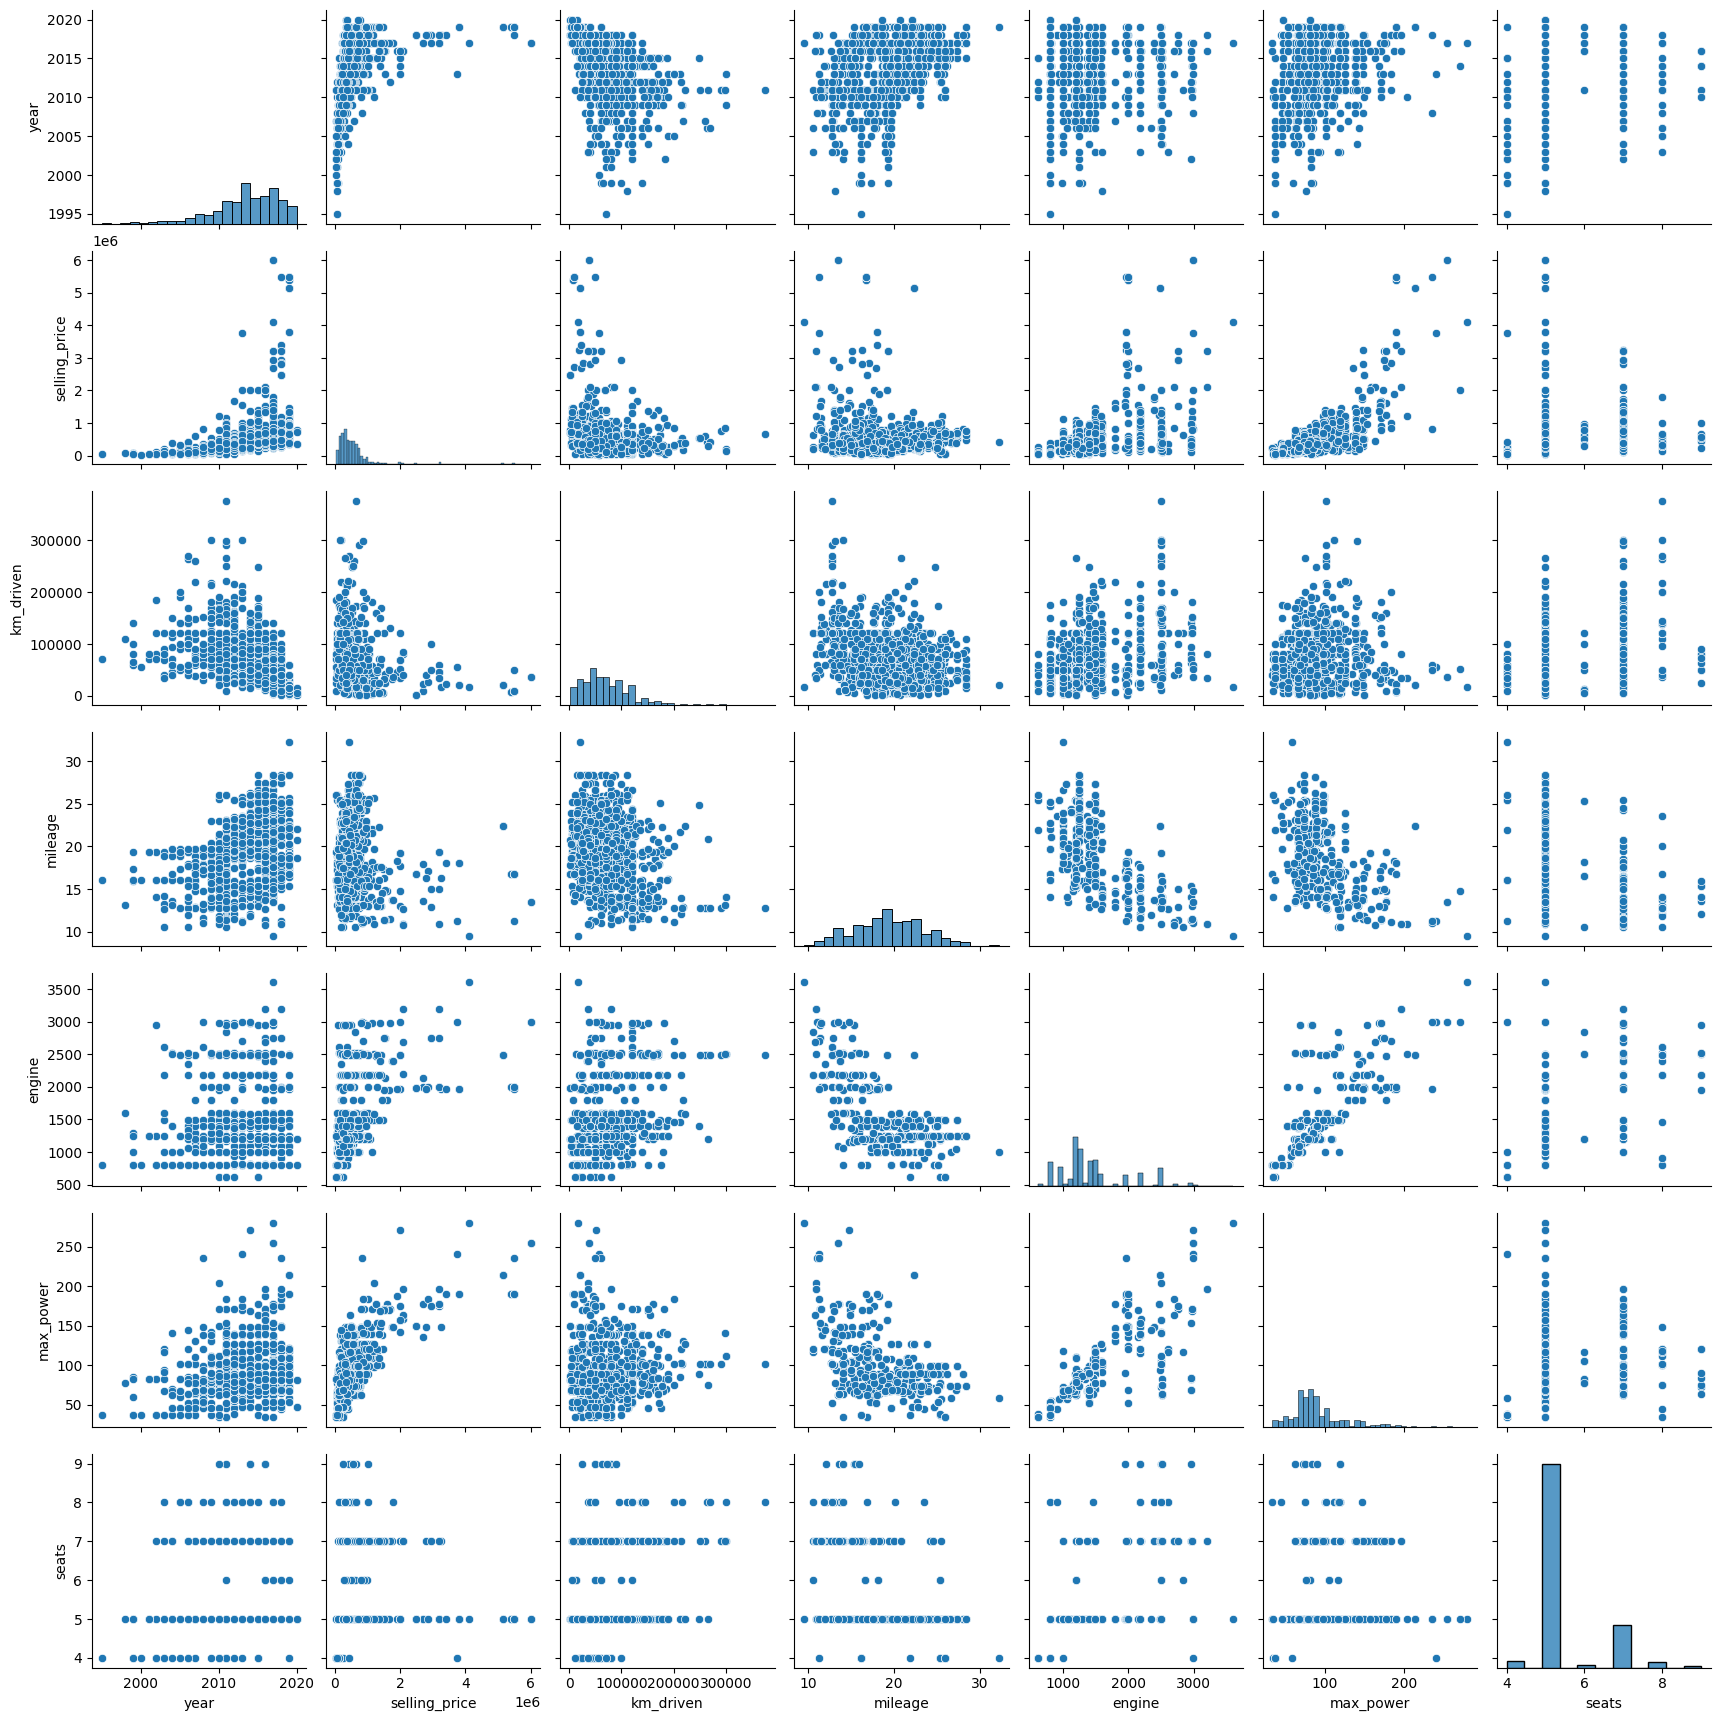

In [41]:
sns.pairplot(df_test)
#Графики df_test и df_train похожи, видимо потому-что я аномалии убрал! С аномалиями наверно графики бы отличались!

In [42]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

На все вопросы я ответил в комментариях к графикам!

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

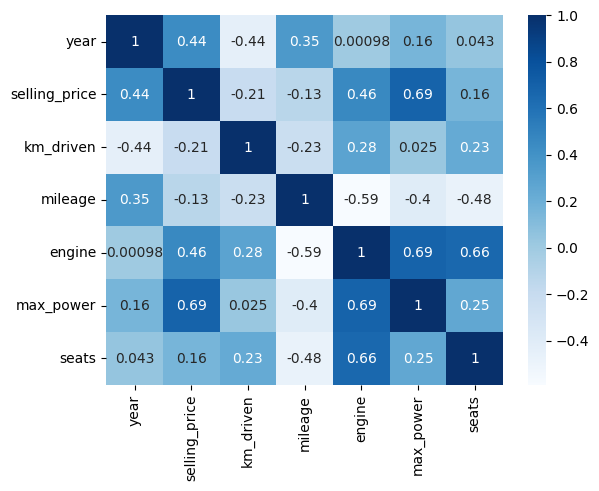

In [43]:
corr = df_train.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Признаки engine и year наименее все скоррелированы между собой.
2. Сильная положительная линейная зависимость наблюдается между:
- selling_price и max_power
- max_power и engine
- seats и engine
- selling_price и year
- selling_price и engine
3. Все верно, между km_driven и year коэффициент коррелиации -0.44, обратная зависимость

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Ответ: Мы не построили гистограммы распределения числовых признаков. Так как у нас "линейная регрессия", то нам возможно потребется нормальное распределение данных, соответственно нам придется убрать выбросы! Судя по графикам они есть, особенно в колонках selling_price и km_driven. Как видим графики распределения train и test отличаются. И еще необходимо построить boxplot целевой переменной selling_price. Судя по boxplot на train и test выбросы есть!

11it [00:00, 27.82it/s]


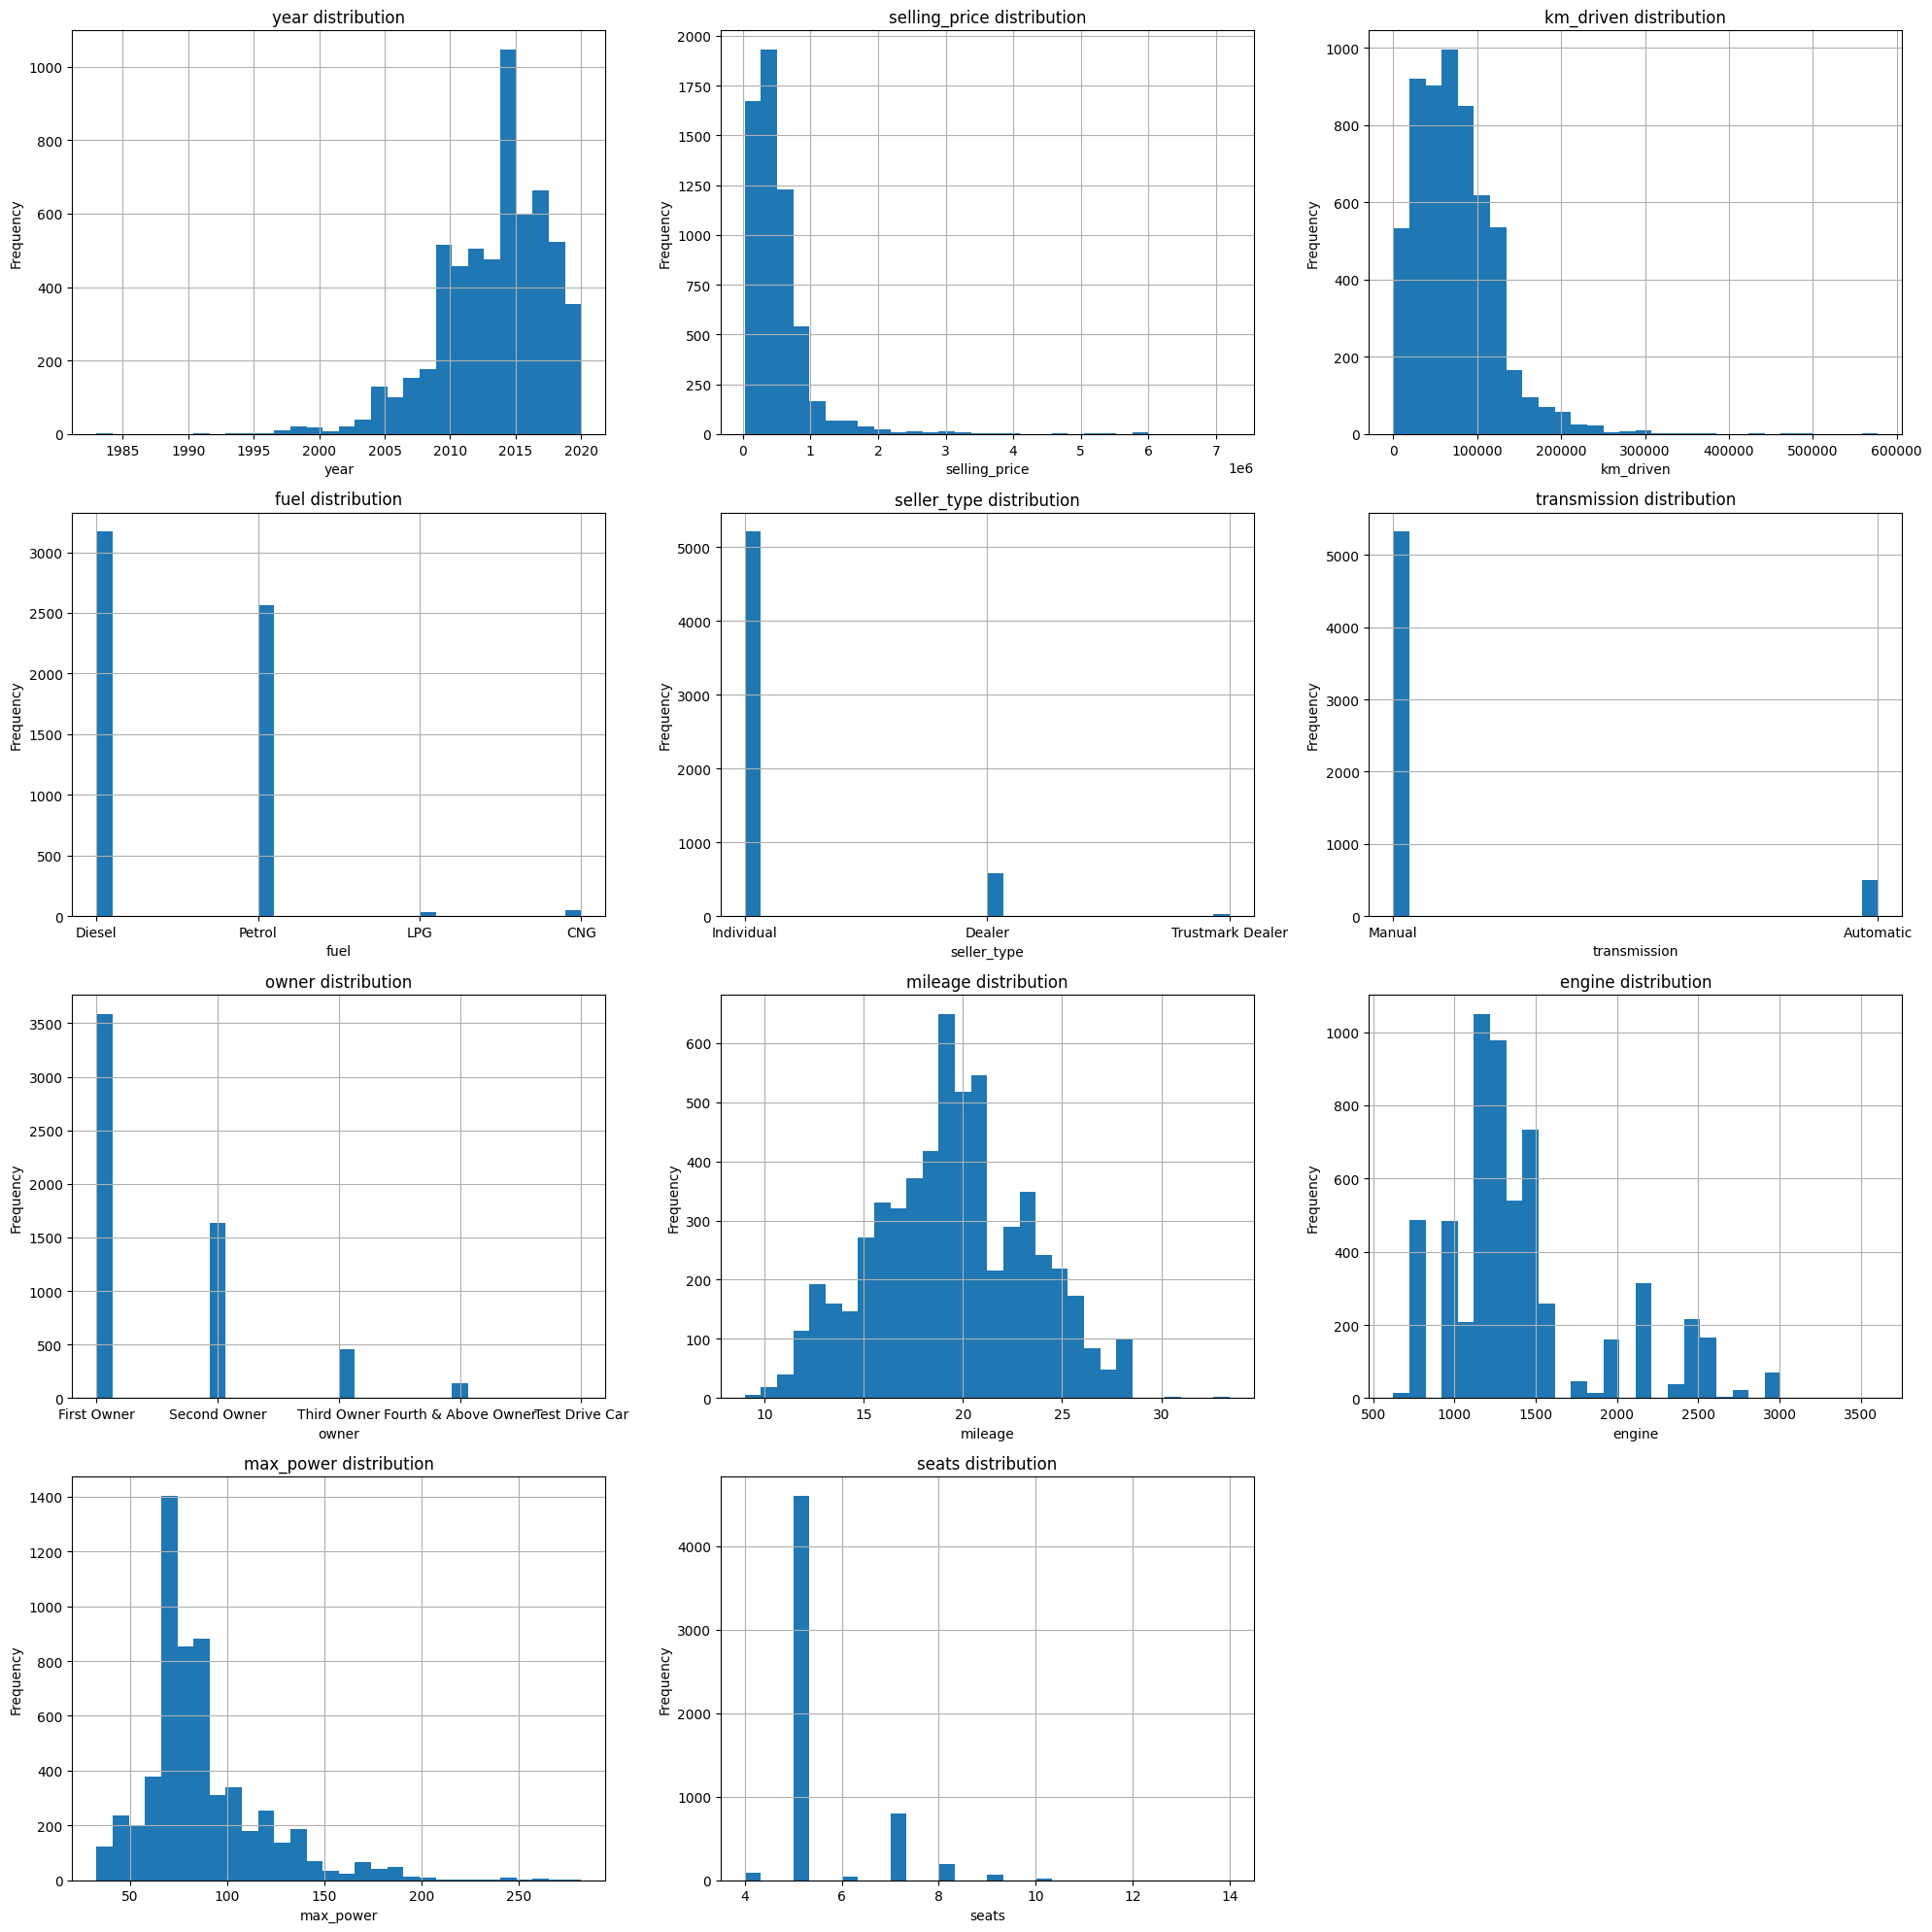

In [44]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train_temp = df_train.copy()
df_train_temp = df_train_temp.drop('name', axis=1)
numeric_cols = df_train_temp.columns
num_cols = len(numeric_cols)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for ax, col in tqdm(zip(axes[:num_cols], numeric_cols)):
    ax.hist(df_train_temp[col], bins=30, alpha=1)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

11it [00:00, 78.64it/s]


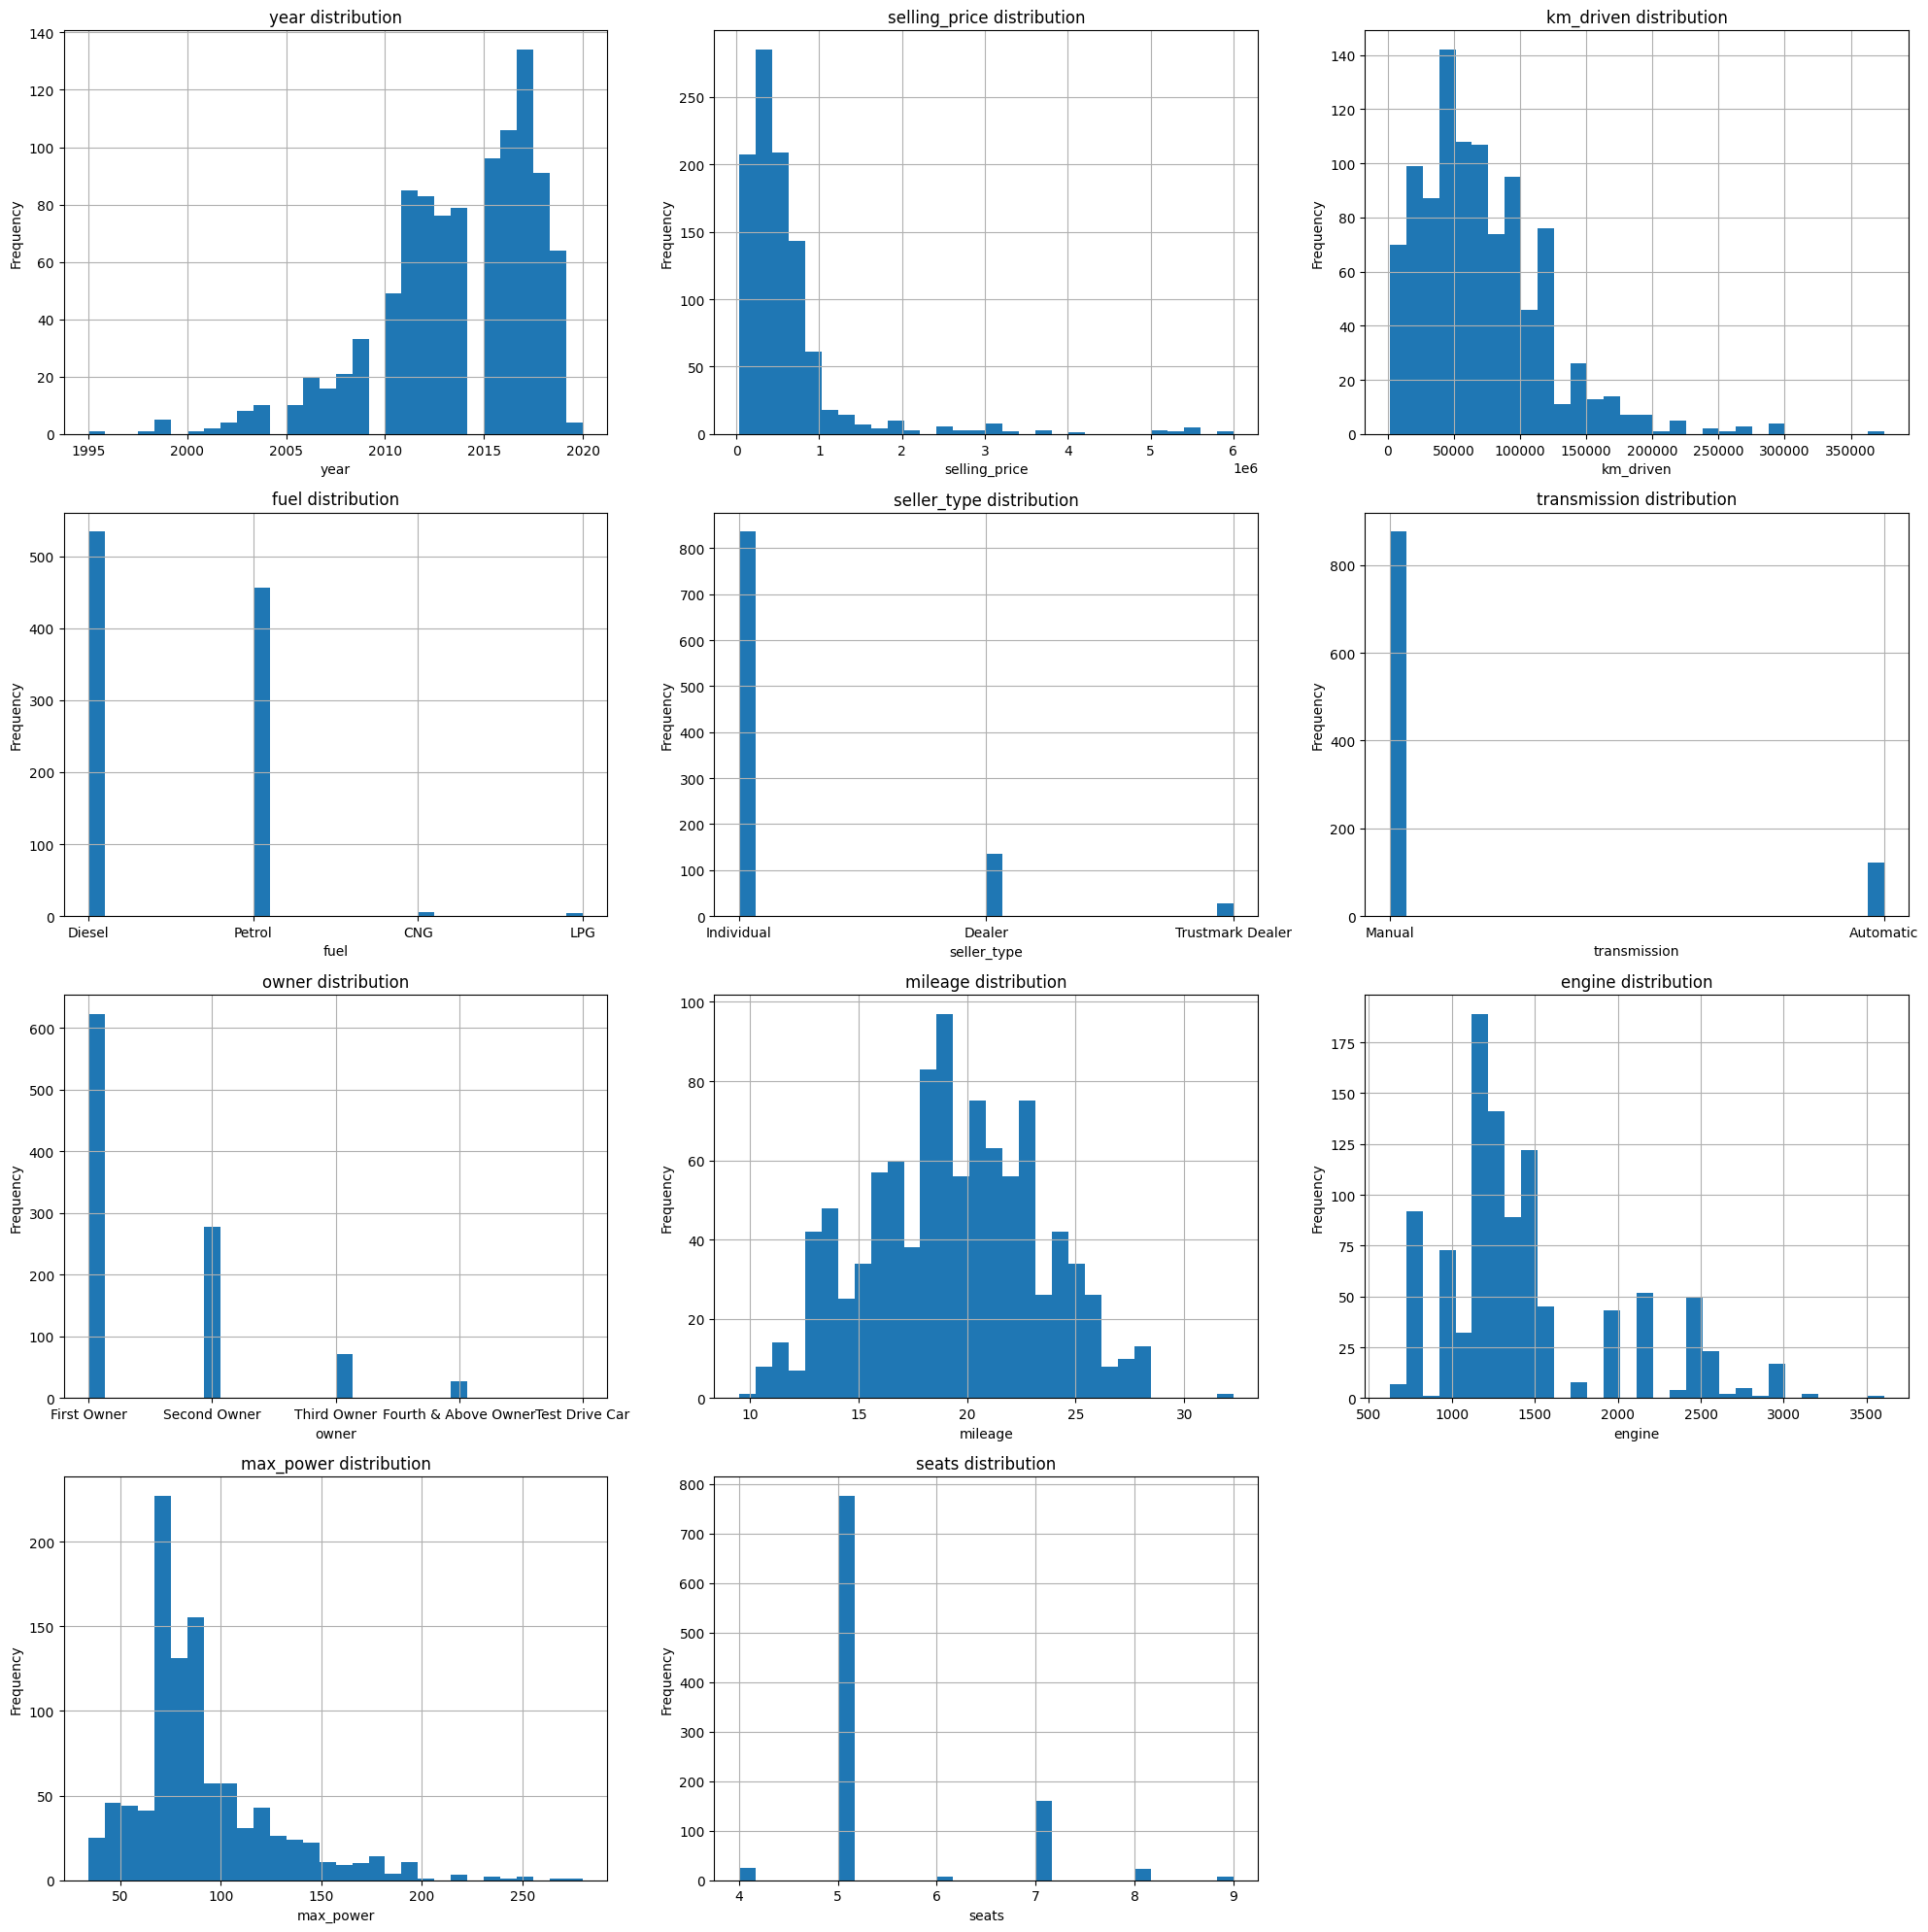

In [45]:
df_test_temp = df_test.copy()
df_test_temp = df_test_temp.drop('name', axis=1)
numeric_cols = df_test_temp.columns
num_cols = len(numeric_cols)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for ax, col in tqdm(zip(axes[:num_cols], numeric_cols)):
    ax.hist(df_test_temp[col], bins=30, alpha=1)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c119d2da10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c119d2ec90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c119cf4c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c119d2fc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c119d3c510>],
 'means': []}

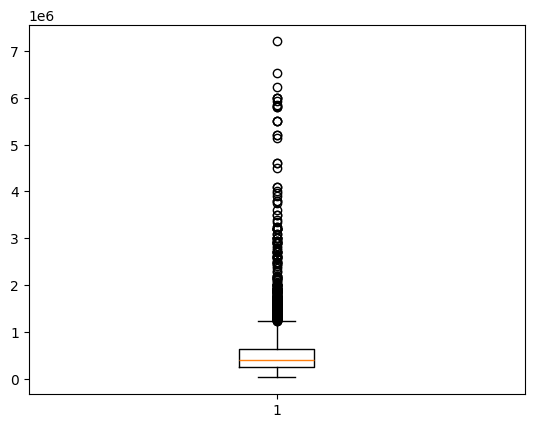

In [46]:
#Нарисуем boxplot целевой переменной
plt.boxplot(df_train['selling_price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c119d9d6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c119d9e990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c119d9cf10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c119d9fb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c119dac410>],
 'means': []}

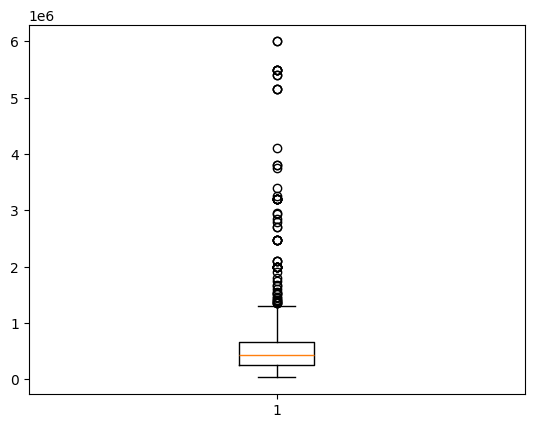

In [47]:
plt.boxplot(df_test['selling_price'])

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_train_c = df_train.copy()
df_test_c = df_test.copy()

df_train_f = df_train_c.select_dtypes([int, float])
df_test_f = df_test_c.select_dtypes([int, float])

X_train = df_train_f.drop('selling_price', axis=1)
y_train = df_train_f['selling_price']


In [49]:
assert X_train.shape == (5820, 6)

In [50]:
X_test = df_test_f.drop('selling_price', axis=1)
y_test = df_test_f['selling_price']

In [51]:

assert X_test.shape == (999, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

pred_test = model.predict(X_test)
mse_test=MSE(y_test, pred_test)
R2_test=r2_score(y_test, pred_test)
print(f'MSE_test = {mse_test}')
print(f'R2_test = {R2_test}')

pred_train = model.predict(X_train)
mse_train=MSE(y_train, pred_train)
R2_train=r2_score(y_train, pred_train)
print(f'MSE_train = {mse_train}')
print(f'R2_train = {R2_train}')

MSE_test = 235192262956.64026
R2_test = 0.5910806044539189
MSE_train = 108955192317.8405
R2_train = 0.5967435048135485


In [53]:
model.coef_

array([ 3.54566425e+04, -1.29556811e+00,  6.47671739e+03,  1.69513350e+02,
        9.44369414e+03, -2.43586454e+04])

In [54]:
y_train.describe()

count    5.820000e+03
mean     5.209268e+05
std      5.198411e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.045000e+05
75%      6.400000e+05
max      7.200000e+06
Name: selling_price, dtype: float64

In [55]:
y_test.describe()

count    9.990000e+02
mean     6.183994e+05
std      7.587700e+05
min      3.100000e+04
25%      2.500000e+05
50%      4.349990e+05
75%      6.700000e+05
max      6.000000e+06
Name: selling_price, dtype: float64

Выводы:
1. Судя по датасету, средняя цена по selling_price примерно 570000, если расматривать train и test. MSE - это RMSE в квадрате. Если сравнивать RMSE_test=484966 со средней ценой, то ошибка большая.
2. Если сравнивать MSE_train и MSE_test, то разница почти в двое, вероятно в тестовых данных есть выбросы. Если расматривать boxplot целевых переменных, то в тестовых данных есть более разряженные выбросы, чем в трейне, возможно это из-за этого. MSE более чувствителен к выбросом, возможно нобходимо использовать метрику MAE.
3. Если оценивать R2, то хорошие модели у нас начинаются от 0.8, а у нас 0.59 в train и test, скажем так - средненькая модель получилась, но зато R2 одинаковы что в тесте, что в трейне - это значит у нас нет переобучения.


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [103]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X_train)
train_X_scaled = scaler_X.transform(X_train)
test_X_scaled = scaler_X.transform(X_test)

numeric_x = df_test_f.drop('selling_price', axis=1).columns
train_df_X_scaled = pd.DataFrame(train_X_scaled, columns=numeric_x, index=df_train_f.index)
test_df_X_scaled = pd.DataFrame(test_X_scaled, columns=numeric_x, index=df_test_f.index)

model_scaler = LinearRegression()
model_scaler.fit(train_df_X_scaled, y_train)

pred_test_scaler = model_scaler.predict(test_df_X_scaled)
mse_tes_scaler=MSE(y_test, pred_test_scaler)
R2_test_scaler=r2_score(y_test, pred_test_scaler)
print(f'MSE_test = {mse_tes_scaler}')
print(f'R2_test = {R2_test_scaler}')

pred_train_scaler = model_scaler.predict(train_df_X_scaled)
mse_train_scaler=MSE(y_train, pred_train_scaler)
R2_train_scaler=r2_score(y_train, pred_train_scaler)
print(f'MSE_train = {mse_train_scaler}')
print(f'R2_train = {R2_train_scaler}')

MSE_test = 235192262956.6288
R2_test = 0.5910806044539387
MSE_train = 108955192317.84044
R2_train = 0.5967435048135488


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [104]:
B_coef = model_scaler.coef_
important = np.argmax(np.abs(B_coef))

In [105]:
B_coef

array([145246.74838654, -63041.74946573,  25033.04125225,  82234.58304277,
       295504.56647696, -23901.70005952])

In [106]:
print(f"Индекс числового признака, который самый важный - {important+1}")

Индекс числового признака, который самый важный - 5


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5820 non-null   object 
 1   year           5820 non-null   int64  
 2   selling_price  5820 non-null   int64  
 3   km_driven      5820 non-null   int64  
 4   fuel           5820 non-null   object 
 5   seller_type    5820 non-null   object 
 6   transmission   5820 non-null   object 
 7   owner          5820 non-null   object 
 8   mileage        5820 non-null   float64
 9   engine         5820 non-null   int64  
 10  max_power      5820 non-null   float64
 11  seats          5820 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 545.8+ KB


Вывод: Пятый признак - это max_power! Понятное дело, люди, когда покупают автомобиль, всегда смотрят на мощность, а еменно на количество лошадиных сил!

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [112]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler_min_max = MinMaxScaler()
X_train_normalized = scaler_min_max.fit_transform(X_train)
X_test_normalized = scaler_min_max.transform(X_test)
# for a in np.arange(0.001, 1, 0.25):
lasso = Lasso()
lasso.fit(X_train_normalized, y_train)

y_pred_train_lasso = lasso.predict(X_train_normalized)
y_pred_test_lasso = lasso.predict(X_test_normalized)

print(f'Train MSE: = {MSE(y_train, y_pred_train_lasso)}')
R2_train_lasso=r2_score(y_train, y_pred_train_lasso)
print(f'R2_train = {R2_train_lasso}')

print(f'Test MSE: = {MSE(y_test, y_pred_test_lasso)}')
R2_test_lasso=r2_score(y_test, y_pred_test_lasso)
print(f'R2_test = {R2_test_lasso}')
print(lasso.coef_, '\n')


Train MSE: = 108955192993.79448
R2_train = 0.5967435023117602
Test MSE: = 235198508118.1327
R2_test = 0.5910697462410233
[1311878.58129357 -747919.53012789  158228.57049434  504916.43583097
 2353430.34979727 -243326.12639631] 



In [62]:
# R2_test_scaler=r2_score(test_df_y_scaled, pred_test_scaler)
# print(f'MSE_test = {mse_tes_scaler}')
# print(f'R2_test = {R2_test_scaler}')

# pred_train_scaler = model_scaler.predict(train_df_X_scaled)
# mse_train_scaler=MSE(train_df_y_scaled, pred_train_scaler)
# R2_train_scaler=r2_score(train_df_y_scaled, pred_train_scaler)
# print(f'MSE_train = {mse_train_scaler}')
# print(f'R2_train = {R2_train_scaler}')

Вывод: Веса как видим не занулились, ну и ошибка MSE и R2 не изменились. Параметр alpha в Lasso контролирует силу регуляризации. Если alpha слишком маленьки, регуляризация слабенькая и модель ведёт себя почти как обычная линейная регрессия. Из-за маленького alpha веса не занулилсь соответственно!


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [123]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'alpha': np.logspace(-5, 5, num=1000)}
# param_grid = {'alpha': np.arange(0.0001, 0.1, 0.001)}
lasso_new = Lasso(max_iter=30000)

grid_scv = GridSearchCV(lasso_new, param_grid, cv=10)
grid_scv.fit(X_train_normalized, y_train)

best_lasso_new = grid_scv.best_estimator_

num_lasso_new = len(param_grid['alpha']) * 10
zero_weights_lasso_new = np.sum(best_lasso_new.coef_ == 0)

best_alpha = grid_scv.best_params_['alpha']

print(f"Количество обученных моделей: {num_lasso_new}")
print(f"Лучший коэффициент альфа: {best_alpha}")
print(f"Количество занулённых весов: {zero_weights_lasso_new}")


Количество обученных моделей: 10000
Лучший коэффициент альфа: 487.1780218794631
Количество занулённых весов: 0


In [124]:
y_pred_train_lasso_new = best_lasso_new.predict(X_train_normalized)
y_pred_test_lasso_new = best_lasso_new.predict(X_test_normalized)

print(f'Train MSE: = {MSE(y_train, y_pred_train_lasso_new)}')
print(f'Test MSE: = {MSE(y_test, y_pred_test_lasso_new)}')

R2_test_lasso_new = r2_score(y_test, y_pred_test_lasso_new)
R2_train_lasso_new = r2_score(y_train,y_pred_train_lasso_new)

print(f'R2_test = {R2_test_lasso_new}')
print(f'R2_train = {R2_train_lasso_new}')

best_lasso_new.coef_

Train MSE: = 109112864510.73907
Test MSE: = 238395788468.5419
R2_test = 0.5855107625744487
R2_train = 0.5961599407396937


array([1302242.88381278, -672115.96257306,  129150.17516287,
        393201.18500305, 2382914.91718541, -117215.05301718])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [128]:
from sklearn.linear_model import ElasticNet
import time

# alpha = np.arange(0.01, 1, 0.01)
alpha = np.logspace(-5, 5, num=100)
l1_ratio = np.linspace(0.1,0.9,num=100)


param_grid = {'alpha': alpha, 'l1_ratio':l1_ratio}
model_elnet = ElasticNet(max_iter=50000)

grid_scv = GridSearchCV(model_elnet, param_grid, cv=10)

start_time = time.time()
grid_scv.fit(X_train_normalized, y_train)
end_time = time.time()
spent_time = end_time - start_time

best_alpha = grid_scv.best_params_['alpha']
best_l1_ratio = grid_scv.best_params_['l1_ratio']
best_elasticnet = grid_scv.best_estimator_
print(f"Наилучший праметр alpha: {best_alpha}")
print(f"Наилучший праметр l1_ratio: {best_l1_ratio}")
print(f"Затраченное время обучения грид-сёрчу: {round(spent_time)} сек ")

Наилучший праметр alpha: 0.013530477745798061
Наилучший праметр l1_ratio: 0.9
Затраченное время обучения грид-сёрчу: 354 сек 


In [129]:
y_pred_train_ElasticNet = best_elasticnet.predict(X_train_normalized)
y_pred_test_ElasticNet = best_elasticnet.predict(X_test_normalized)

print(f'Train MSE: = {MSE(y_train, y_pred_train_ElasticNet)}')
print(f'Test MSE: = {MSE(y_test, y_pred_test_ElasticNet)}')

R2_test_ElasticNe = r2_score(y_test, y_pred_test_ElasticNet)
R2_train_ElasticNe = r2_score(y_train, y_pred_train_ElasticNet)

print(f'R2_test = {R2_test_ElasticNe}')
print(f'R2_train = {R2_train_ElasticNe}')

Train MSE: = 109779227701.50916
Test MSE: = 247154059918.1177
R2_test = 0.5702831057537423
R2_train = 0.593693649054876


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [67]:
# я уже удалял столбец name и преобразовывал в датафреймы df_train_temp и df_test_temp

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [68]:
# assert X_train_cat.shape == (5840, 10)

In [69]:
#В колонке name самое первое слово  - это марка автомобиля, именно она влияет на цену.
#Модели автомибелей групируются в зависимости от технических характеристик, которые указаны в остальных колонках.
#Другие обозначения после модели автомобиля - это тоже технические характеристики, которые указаны в других колонках.
#В итоге колонку name целесообразно трансформировать в марки автомобилей, что мы и сделаем
from sklearn.preprocessing import OneHotEncoder

def column_stamp(x):
  stamp = x.split()
  return stamp[0]


df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

df_train_temp['stamp']=df_train_temp['name'].apply(column_stamp)


df_test_temp['stamp']=df_test_temp['name'].apply(column_stamp)

hot_encoder = OneHotEncoder(drop='first', sparse_output=True)

encoded_train_temp = hot_encoder.fit_transform(df_train_temp[['stamp']])
one_hot_df_train_temp = pd.DataFrame(encoded_train_temp.toarray(), columns=hot_encoder.get_feature_names_out(['stamp']))

columns_train_encod = one_hot_df_train_temp.columns

encoded_test_temp = hot_encoder.fit_transform(df_test_temp[['stamp']])
one_hot_df_test_temp = pd.DataFrame(encoded_test_temp.toarray(), columns=hot_encoder.get_feature_names_out(['stamp']))

columns_test_encod = one_hot_df_test_temp.columns

for col in columns_train_encod:
    if col not in one_hot_df_test_temp:
        one_hot_df_test_temp[col] = 0

for col in columns_test_encod:
    if col not in one_hot_df_train_temp:
        one_hot_df_train_temp[col] = 0

df_train_X_cat = pd.concat([train_df_X_scaled, one_hot_df_train_temp], axis=1)
df_test_X_cat = pd.concat([test_df_X_scaled, one_hot_df_test_temp], axis=1)


In [70]:
df_train_X_cat_1 = df_train_X_cat.drop('seats', axis=1)
df_test_X_cat_1 = df_test_X_cat.drop('seats', axis=1)

In [71]:
df_train_temp.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     5820    5820        5820         5820         5820   
unique                    1914       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                        91    3169        5208         5322         3588   

         stamp  
count     5820  
unique      30  
top     Maruti  
freq      1802

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [72]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

hot_encoder = OneHotEncoder(drop='first', sparse_output=True)

columns_encode = ['fuel','seller_type','transmission','owner','seats']

encoded_train_new = hot_encoder.fit_transform(df_train_temp[columns_encode])
one_hot_df_train_new = pd.DataFrame(encoded_train_new.toarray(), columns=hot_encoder.get_feature_names_out(columns_encode))

columns_train_encod_new = one_hot_df_train_new.columns

encoded_test_new = hot_encoder.fit_transform(df_test_temp[columns_encode])
one_hot_df_test_new = pd.DataFrame(encoded_test_new.toarray(), columns=hot_encoder.get_feature_names_out(columns_encode))

columns_test_encod_new = one_hot_df_test_new.columns

for col in columns_train_encod_new:
    if col not in one_hot_df_test_new:
        one_hot_df_test_new[col] = 0

for col in columns_test_encod_new:
    if col not in one_hot_df_train_new:
        one_hot_df_train_new[col] = 0

df_train_X_cat_oh = pd.concat([df_train_X_cat_1, one_hot_df_train_new], axis=1)
df_test_X_cat_oh = pd.concat([df_test_X_cat_1, one_hot_df_test_new], axis=1)

In [73]:
df_train_X_cat_oh_sort = df_train_X_cat_oh[sorted(df_train_X_cat_oh.columns)]
df_test_X_cat_oh_sort = df_test_X_cat_oh[sorted(df_test_X_cat_oh.columns)]

In [130]:
model_cat_oh = LinearRegression()
model_cat_oh.fit(df_train_X_cat_oh_sort, y_train)

LinearRegression()

In [132]:
y_pred_train_oh = model_cat_oh.predict(df_train_X_cat_oh_sort)
y_pred_test_oh = model_cat_oh.predict(df_test_X_cat_oh_sort)

print(f'Train MSE: = {MSE(y_train, y_pred_train_oh)}')
print(f'Test MSE: = {MSE(y_test, y_pred_test_oh)}')

R2_test_oh = r2_score(y_test, y_pred_test_oh)
R2_train_oh = r2_score(y_train, y_pred_train_oh)

print(f'R2_test = {R2_test_ElasticNe}')
print(f'R2_train = {R2_train_ElasticNe}')

Train MSE: = 59378030416.027664
Test MSE: = 120314790156.17291
R2_test = 0.5702831057537423
R2_train = 0.593693649054876


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [133]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': np.arange(0.001, 1, 0.001)}


grid_scv_ridge = GridSearchCV(ridge, param_grid, scoring='r2', cv=10)
grid_scv_ridge.fit(X_train_normalized, y_train)

best_ridge = grid_scv_ridge.best_estimator_


In [136]:
mse_train_ridge = MSE(y_train, best_ridge.predict(X_train_normalized))
R2_train_ridge = r2_score(y_train, best_ridge.predict(X_train_normalized))
print(f'MSE_train = {mse_train_ridge}')
print(f'R2_train = {R2_train_ridge}')

mse_test_ridge = MSE(y_test, best_ridge.predict(X_test_normalized))
R2_test_ridge = r2_score(y_test, best_ridge.predict(X_test_normalized))
print(f'MSE_test = {mse_test_ridge}')
print(f'R2_test = {R2_test_ridge}')

MSE_train = 108971855911.51126
R2_train = 0.5966818308149264
MSE_test = 236734428149.92972
R2_test = 0.5883993034164422


Вывод: Как видим, регулирезация не работает, результаты остаются прежними. Метрики улучшились после того, как мы закодировали категориальные признаки, в итоге уменьшили ошибку.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [138]:
def business_metric(y_true, y_pred):
    y_true_array = np.array(y_true)
    y_pred_array = np.array(y_pred)
    bisness_chek_array = np.abs(y_true_array - y_pred_array) / y_true_array <= 0.1
    return np.mean(bisness_chek_array)

#LinearRegression
lin_mod = business_metric(y_test,pred_test)
print(f"Обычная линейная регресия  - {lin_mod}")
#StandardScaler()
scaler_mod = business_metric(y_test, pred_test_scaler)
print(f"Модель со стандартизацией model_scaler - {scaler_mod}")
#Lasso
lasso_gridsearch = business_metric(y_test, y_pred_test_lasso_new)
print(f"Модель c регулеризацией Lasso c GridSearch - {lasso_gridsearch}")
#ElasticNet
elasticnet_mod = business_metric(y_test, y_pred_test_ElasticNet)
print(f"Модель c регулеризацией ElasticNet - {elasticnet_mod}")
#Добавление категориальных фичей
cat_mod = business_metric(y_test, y_pred_test_oh)
print(f"Модель c добавлением категориальных фичей - {cat_mod}")
#Ridge
ridge_mod = business_metric(y_test, best_ridge.predict(X_test_normalized))
print(f"Модель c регулеризацией Ridge- {ridge_mod}")

Обычная линейная регресия  - 0.23023023023023023
Модель со стандартизацией model_scaler - 0.23023023023023023
Модель c регулеризацией Lasso c GridSearch - 0.22822822822822822
Модель c регулеризацией ElasticNet - 0.24024024024024024
Модель c добавлением категориальных фичей - 0.29429429429429427
Модель c регулеризацией Ridge- 0.23423423423423423


Вывод: Модель с добавлением категориальных фичей больше нам подходит для бизнеса. Измерение мы проводили в тестовой выборке, так как там ошибка МSE больше чем в трэйне.

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [80]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

